# Analyzing Crime Data for Baltimore

#### Valerie Bonilla

As of February 2022, forbes.com, has listed Baltimore, Maryland as the fifth most dangerous city in the United States in terms of crime. I will be anazlying a dataset from the U.S. Government, catalog.data.gov, that contains crime data for the City of Baltimore. The data goes back as far as 1963 but I will be focusing on the data so far from 2022 (January to May). The crimes I will be focusing on are will be the top four most committed crimes in 2022. I will look at these crimes' monthly frequency to find any trends or patterns.

In [378]:
import folium
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

These are the libraries you will need to run this project.

For more information on popular libaries and their uses: https://builtin.com/data-science/python-libraries-data-science

## Data Collection

This is the first phase in the 'Data Science Pipeline'. Here, I find a dataset I want to analyze and extract the data into a usable format. In my case, I obtained a dataset from the U.S. Government: https://catalog.data.gov/dataset/part1-crime-data-0f0c1. 

In [379]:
url = 'https://data.baltimorecity.gov/datasets/baltimore::part1-crime-data.csv?outSR=%7B%22latestWkid%22%3A2248%2C%22wkid%22%3A102685%7D'
r = requests.get(url, allow_redirects = True)

open('Crime.csv', 'wb').write(r.content)

98018958

I obtained the dataset link address (url variable) by right-clicking on the download button next to the 'csv' option. I used 'requests.get' to send an HTTP request to get the 'csv' file. I used 'open()' and '.write()' to open and write the file so that when the code is ran, the file is saved locally.

In [380]:
crime_table = pd.read_csv("Crime.csv")
crime_table

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.404448e+06,611146.518110,1,2022/05/07 03:40:00+00,4C,4800 WILERN AVE,AGG. ASSAULT,NaN,NaN,614,NORTHWEST,CENTRAL PARK HEIGHTS,39.3443,-76.6743,"(39.3443,-76.6743)",NaN,Northwestern,1,NaN
1,1.401489e+06,608112.934859,2,2022/05/07 13:20:00+00,4C,4300 GARRISON BLVD,AGG. ASSAULT,NaN,OTHER,621,NORTHWEST,WEST ARLINGTON,39.3360,-76.6848,"(39.336,-76.6848)",NaN,NaN,1,NaN
2,1.413772e+06,577562.449954,3,2022/05/07 07:00:00+00,7A,2900 MALLVIEW RD,AUTO THEFT,NaN,NaN,923,SOUTHERN,LAKELAND,39.2520,-76.6418,"(39.252,-76.6418)",NaN,NaN,1,NaN
3,1.408948e+06,587742.484348,4,2022/05/07 07:15:00+00,4E,500 EASTLYNNE AV,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,834,SOUTHWEST,MILLHILL,39.2800,-76.6587,"(39.28,-76.6587)",NaN,NaN,1,NaN
4,1.419726e+06,602937.288092,5,2022/05/07 06:50:00+00,4E,200 W 28TH ST,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,511,NORTHERN,REMINGTON,39.3216,-76.6204,"(39.3216,-76.6204)",NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520167,1.400822e+06,604541.096449,520168,1973/07/01 23:00:00+00,2A,4000 SPRINGDALE AVE,RAPE,I,OTHER,621,NORTHWEST,CENTRAL FOREST PARK,39.3262,-76.6872,"(39.3262,-76.6872)",ROW/TOWNHOUSE-OCC,NaN,1,NaN
520168,1.409359e+06,598671.099707,520169,1970/06/15 00:01:00+00,2A,2400 ST STEPHENS CT,RAPE,I,OTHER,731,WESTERN,MONDAWMIN,39.3100,-76.6571,"(39.31,-76.6571)",ROW/TOWNHOUSE-OCC,NaN,1,NaN
520169,1.415457e+06,616506.081314,520170,1969/07/20 21:00:00+00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,39.3589,-76.6353,"(39.3589,-76.6353)",NaN,NaN,1,NaN
520170,1.394549e+06,593520.411508,520171,1966/01/01 01:00:00+00,2A,900 STAMFORD RD,RAPE,I,OTHER,823,SOUTHWEST,WEST HILLS,39.2960,-76.7095,"(39.296,-76.7095)",ROW/TOWNHOUSE-OCC,NaN,1,NaN


I used the 'read_csv' function from the pandas library to read in a csv file into a pandas DataFrame. A DataFrame is a data structure that can be described as table with rows and columns, as you can see when I display my DataFrame, 'crime_table'.

The documentation for pandas.DataFrame can be found at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

## Data Management

This is the second phase of the 'Data Science Pipeline'. This where I'll be tidying the data. The purpose of 'Data Management' is to make it easier to extract needed data. I will be removing unnecessary columns and rows, adding in column(s) that will help with data analysis later on, and cleaning up certain data values.

A good resource for data management/tidying: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

In [381]:
updated_table = crime_table.drop(columns = ['X', 'Y', 'RowID', 'VRIName', 'Premise'])
updated_table = updated_table.drop(range(11710, 520172))

time_format = "%Y/%m/%d %H:%M:%S+00"
for idx in updated_table.index:
    updated_table.at[idx, 'CrimeDateTime'] = datetime.strptime(updated_table.at[idx, 'CrimeDateTime'], time_format)

updated_table['Month'] = ""
for index in updated_table.index:
    date = updated_table.at[index, 'CrimeDateTime']
    updated_table.at[index, 'Month'] = date.month
    
updated_table

,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Total_Incidents,Shape,Month
0,2022-05-07 03:40:00,4C,4800 WILERN AVE,AGG. ASSAULT,NaN,NaN,614,NORTHWEST,CENTRAL PARK HEIGHTS,39.3443,-76.6743,"(39.3443,-76.6743)",1,NaN,5
1,2022-05-07 13:20:00,4C,4300 GARRISON BLVD,AGG. ASSAULT,NaN,OTHER,621,NORTHWEST,WEST ARLINGTON,39.3360,-76.6848,"(39.336,-76.6848)",1,NaN,5
2,2022-05-07 07:00:00,7A,2900 MALLVIEW RD,AUTO THEFT,NaN,NaN,923,SOUTHERN,LAKELAND,39.2520,-76.6418,"(39.252,-76.6418)",1,NaN,5
3,2022-05-07 07:15:00,4E,500 EASTLYNNE AV,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,834,SOUTHWEST,MILLHILL,39.2800,-76.6587,"(39.28,-76.6587)",1,NaN,5
4,2022-05-07 06:50:00,4E,200 W 28TH ST,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,511,NORTHERN,REMINGTON,39.3216,-76.6204,"(39.3216,-76.6204)",1,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11705,2022-01-01 02:50:00,4B,AV & E BALTIMORE ST,AGG. ASSAULT,Inside,KNIFE_CUTTING_INSTRUMENT,111,CENTRAL,DOWNTOWN,39.2897,-76.6110,"(39.2897,-76.611)",1,NaN,1
11706,2022-01-01 02:50:00,4B,AV & E BALTIMORE ST,AGG. ASSAULT,Inside,KNIFE_CUTTING_INSTRUMENT,111,CENTRAL,DOWNTOWN,39.2897,-76.6110,"(39.2897,-76.611)",1,NaN,1
11707,2022-01-01 02:20:00,4B,700 S BETHEL ST,AGG. ASSAULT,Inside,KNIFE_CUTTING_INSTRUMENT,213,SOUTHEAST,FELLS POINT,39.2834,-76.5944,"(39.2834,-76.5944)",1,NaN,1
11708,2022-01-01 02:20:00,4B,700 S BETHEL ST,AGG. ASSAULT,Inside,KNIFE_CUTTING_INSTRUMENT,213,SOUTHEAST,FELLS POINT,39.2834,-76.5944,"(39.2834,-76.5944)",1,NaN,1


I first used the 'pandas.DataFrame.drop' function to drop five columns from my table: 'X', 'Y', 'RowID', 'VRIName', 'Premise'. I dropped these specific columns because I knew I would not be using them in my data analysis.

I also wanted to drop the rows corresponding to years that were not '2022' so that the table only had the values I needed. I did this by using '.drop' once again by specifying the range of row values that I wanted to delete. The row values went from the first instance of '2021' appearing, which was the 11711th row to the very last row, the 520172th row.

I wanted to change the format of the values in the 'CrimeDateTime' column from YYYY/MM/DD HOUR:MINUTE:SECONDS+00 to just YYYY/MM/DD HOUR:MINUTE:SECONDS. I did this to make the values look neater. I had to specify the format the values were in originally and saved that to the 'time_format' variable. I then went through all the rows in the 'CrimeDateTime' column and used 'datetime.strptime' to parse the orginal value into the datetime object that is now displayed in the 'CrimeDateTime' column.

Lastly, I wanted to add in a column that will make my data analysis easier later on. I intitialized a new column called 'Month' in my data table. I then went through each row, set the 'CrimeDateTime' value for that row into a variable called 'date'. Since this variable is referencing a datetime object, I can use the variable name '.month' to retrieve it's month value. I added that month value to the new 'Month' column. These month values will range from 1 to 5 since there has only been five months in 2022 so far.

The documention for 'datetime' can be found at https://docs.python.org/3/library/datetime.html

## Exploratory Data Analysis

This is the third phase of the 'Data Science Pipeline'. This is where we will perform data analysis to understand any trends or patterns this data might have. I will be using maps and bar plots to do so.

In [382]:
crimes = updated_table['Description'].value_counts()
crimes

COMMON ASSAULT          2899
LARCENY                 2191
AGG. ASSAULT            1658
BURGLARY                1143
LARCENY FROM AUTO       1122
AUTO THEFT              1015
ROBBERY - STREET         478
ROBBERY - COMMERCIAL     337
SHOOTING                 239
ROBBERY - CARJACKING     211
ROBBERY - RESIDENCE      176
HOMICIDE                 116
RAPE                      85
ARSON                     40
Name: Description, dtype: int64

I used the function 'value_counts()' on the 'Description' column which holds the names of the crimes committed. This function returns the counts of unique values which in this case is each crime and the number of times they appear in the table (number of times they were committed).

In [383]:
top_4_crimes = crimes[0:4]
top_4_crimes

COMMON ASSAULT    2899
LARCENY           2191
AGG. ASSAULT      1658
BURGLARY          1143
Name: Description, dtype: int64

Since the crimes and the frequency in which they were committed is in decreasing order, by retreiving the first four values I'm essentially retrieving the top four crimes that were committed in Baltimore. The top four crimes committed were (starting from most frequent) common assault, larceny, aggravated assault, and burglary. It appears that two kinds of assault and two kinds of crimes against property (larceny and burglary) are the most committed crimes in Baltimore in 2022 so far.

In [384]:
neighborhood = updated_table['Neighborhood'].value_counts()
neighborhood

DOWNTOWN               459
BROOKLYN               272
FRANKFORD              233
BELAIR-EDISON          221
CHERRY HILL            172
                      ... 
PORT COVINGTON           2
MORGAN PARK              1
GREENMOUNT CEMETERY      1
BELLONA-GITTINGS         1
LAKE EVESHAM             1
Name: Neighborhood, Length: 273, dtype: int64

I used the function 'value_counts()' on the 'Neighborhood' column to see which neighborhoods had the most crimes committed. 'Downtown' appears to be a dangerous neighborhood with a total of 459 crimes. This is a little over one and a half more times than the amount of crimes committed in the second most dangerous neighborhood, 'Brooklyn', which had a total of 272.

I wanted to use maps to display the locations of the crimes to see if any pattern can be viewed. Conveniently, the dataset came with 'latitude' and 'longitude' values.

The documention for 'maps' can be found at https://python-visualization.github.io/folium/modules.html#module-folium.map 

I will be mapping the top four crimes that were committed: common assault, larceny, aggravated assault, and burglary. I first initialized a map, 'map_osm' by using 'folium.Map' and providing a coordinate location and how zoomed in I want to be on the map. I used the coordinates 39.29 and -76.61 since those correspond to the city of Baltimore. I will explain later how I picked these exact numbers. I went through the data, finding the rows with the 'Description' value being the crime I desire to map, retrieved it's corresponding 'datetime', checked if it's month value was equal to 5 (which corresponds to May), and if it was equal to 5, then I place a marker using it's corresponding 'Latitude' and 'Longitude' values. The reason why I chose to map the crimes committed in May is because May, as of right now, is not over yet. This means that the amount of crimes committed for May is not complete and should be significantly less than it's true amount (that will be known once May is over) and is significantly less than the amount that crime was committed any other month. If I chose to map the amount of times any of the top four crimes were committed in January or February or March or April, there would have been hundreds of markers, essentially making the map useless. I also kept a counter variable so that I would know the exact amount of times the specific crime was committed in May. While I was trying to determine the coordinate location I printed out, inside the for loop, the current latitude and longitude so that I could see the the values where the crime was committed. I noticed a lot of values between 39.22 and 39.37 and between -76.53 and -76.68 so I picked a value between those. Since the values vary a bit I picked a zoom value of 12 so that it's far away enough to see most of the markers. These values can be changed and are just what I chose.

In [385]:
map_osm = folium.Map(location = [39.29, -76.61], zoom_start = 12)
counter = 0;

for index, crime in updated_table[updated_table["Description"] == "COMMON ASSAULT"].iterrows():
    date = updated_table.at[index, 'CrimeDateTime']
    if date.month == 5:
        folium.Marker(location = [crime["Latitude"], crime["Longitude"]], 
                      icon = folium.Icon(color = 'red')).add_to(map_osm)
        counter = counter + 1
        #print(crime["Latitude"], crime["Longitude"])

print(counter)
map_osm

159


There have been 159 common assault crimes reported so far in the month of May. The majority of the markers appear to be directly in Baltimore while they become more sparse the farther away they get. I will assume that most of the crimes in Baltimore come from the neighborhoods located directly in the city of Baltimore, like Downtown for example.

In [386]:
map_osm = folium.Map(location = [39.29, -76.61], zoom_start = 12)
counter = 0;

for index, crime in updated_table[updated_table["Description"] == "LARCENY"].iterrows():
    date = updated_table.at[index, 'CrimeDateTime']
    if date.month == 5:
        folium.Marker(location = [crime["Latitude"], crime["Longitude"]], 
                      icon = folium.Icon(color = 'blue')).add_to(map_osm)
        counter = counter + 1

print(counter)
map_osm

87


There have been 87 larceny crimes reported so far in the month of May. Like before, the majority of the markers appear to be directly in Baltimore while they become more sparse the farther away they get. I will assume that most of the crimes in Baltimore come from the neighborhoods located directly in the city of Baltimore. Since there are less markers it is harder to come to this conclusion.

In [387]:
map_osm = folium.Map(location = [39.29, -76.61], zoom_start = 12)
counter = 0;

for index, crime in updated_table[updated_table["Description"] == "AGG. ASSAULT"].iterrows():
    date = updated_table.at[index, 'CrimeDateTime']
    if date.month == 5:
        folium.Marker(location = [crime["Latitude"], crime["Longitude"]], 
                      icon = folium.Icon(color = 'green')).add_to(map_osm)
        counter = counter + 1

print(counter)
map_osm

87


There have been 87 aggravated assault crimes reported so far in the month of May. That's the same exact amount of larceny crimes that have been committed. Unlike the previous map with the same amount of markers, these markers are more spread out. Therefore I cannot come to the same conclusion that the majority of these crimes happened inside the city of Baltimore.

In [388]:
map_osm = folium.Map(location = [39.29, -76.61], zoom_start = 12)
counter = 0;

for index, crime in updated_table[updated_table["Description"] == "BURGLARY"].iterrows():
    date = updated_table.at[index, 'CrimeDateTime']
    if date.month == 5:
        folium.Marker(location = [crime["Latitude"], crime["Longitude"]], 
                      icon = folium.Icon(color = 'purple')).add_to(map_osm)
        counter = counter + 1

print(counter)
map_osm

56


There have been 56 burglary crimes reported so far in the month of May. Even though there are less markers than the previous map, there's a clump of markers in the middle of the map while they get more spread out as you move away. This clump of markers is close to the city of Baltimore.

Moving on from maps, I will not be using bar plots to plot the frequency of a certain crime, per month (January to May).

I created a function called 'monthly_crime' to count the amount of times the crime that was passed into the function, was committed in the five months that have passed in 2022. I had five counter variables, one for each month. I went through the data to find the rows that corresponded to the specificed crime, retrieved it's month from it's datetime value in the 'CrimeDateTime' column, checked which month it was, and increased it's counter by 1. I returned a list of the counter values which correspond to the crime frequency. 

In [389]:
def monthly_crime(crime):
    counter1 = 0
    counter2 = 0
    counter3 = 0
    counter4 = 0
    counter5 = 0
    
    for index, crime in updated_table[updated_table["Description"] == crime].iterrows():
        date = updated_table.at[index, 'CrimeDateTime']
        if date.month == 1:
            counter1 = counter1 + 1
        if date.month == 2:
            counter2 = counter2 + 1
        if date.month == 3:
            counter3 = counter3 + 1
        if date.month == 4:
            counter4 = counter4 + 1
        if date.month == 5:
            counter5 = counter5 + 1
    
    return [counter1, counter2, counter3, counter4, counter5]

I used https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ to help understand bar plots in matplotlib

For each of the top four crimes, I passed in the crime name to my function to retrieve the frequency of that crime for each month. I created a dataset to have the keys be the numbers 1-5 and the values be the first, second, third, etc values from the list I returned in my function. I created a months variable to hold the keys and a frequency variable to hold the values and plotted them. I set the appropriate labels and titles.

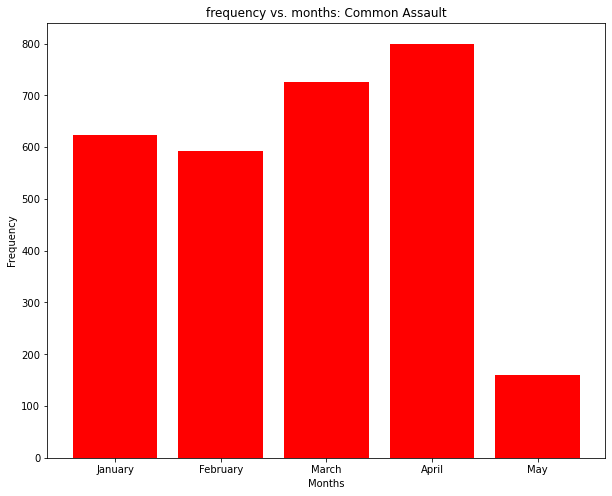

In [390]:
data = monthly_crime("COMMON ASSAULT")

data = {1:data[0], 2:data[1], 3:data[2], 4:data[3], 5:data[4]}
months = list(data.keys())
frequency = list(data.values())

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(months, frequency, color = 'red')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['January', 'February','March', 'April', 'May'])
ax.set(xlabel = 'Months', ylabel = 'Frequency', title = 'frequency vs. months: Common Assault')
plt.show()

Common assault occured the most in April so far in 2022 with a total count near 800. Excluding May (since it is not complete yet and therefore will always appear small compared to the other bars), February had the least total count of common assault crimes with a 600 total. January had near 600 as well while March had a little over a 700 total count. Since January and February had a close count, I'd say it appears as though common assault is increasing each month. Once the May data becomes available we can corroborate to see if this statement proves true (with May having 800 or more counts of commom assault).

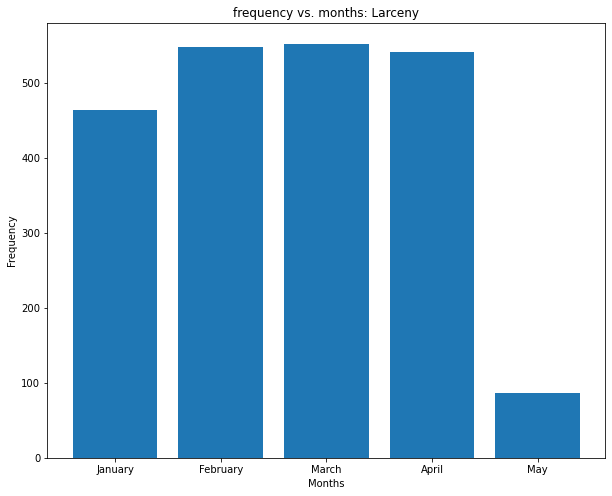

In [391]:
data = monthly_crime("LARCENY")

data = {1:data[0], 2:data[1], 3:data[2], 4:data[3], 5:data[4]}
months = list(data.keys())
frequency = list(data.values())

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(months, frequency)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['January', 'February','March', 'April', 'May'])
ax.set(xlabel = 'Months', ylabel = 'Frequency', title = 'frequency vs. months: Larceny')
plt.show()

Larceny occured the most in March so far in 2022 with a total count near 550. Excluding May once again, January had the least total count of larceny crimes with a total near 475. Unlike the previous graph, this graph is not continually increasing each month but instead appears flat between February and April. It appears as though February, March, and April had very close frequencies, all near 550 total counts. If I had to predict, based on this graph, I would say that May will either be the same (or a little less) than 550 to keep up with this 'flat' trend.

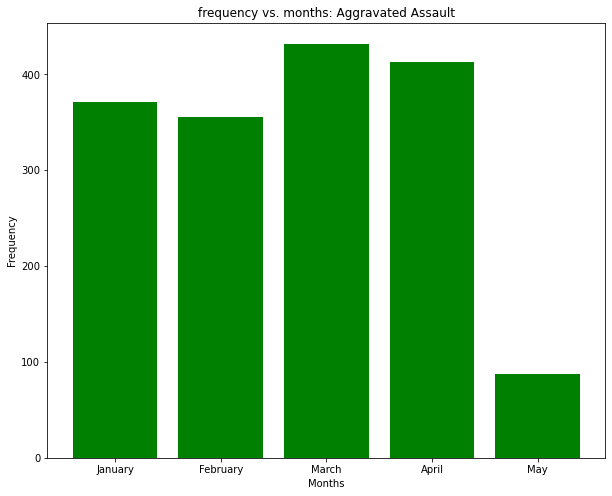

In [392]:
data = monthly_crime("AGG. ASSAULT")

data = {1:data[0], 2:data[1], 3:data[2], 4:data[3], 5:data[4]}
months = list(data.keys())
frequency = list(data.values())

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(months, frequency, color = 'green')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['January', 'February','March', 'April', 'May'])
ax.set(xlabel = 'Months', ylabel = 'Frequency', title = 'frequency vs. months: Aggravated Assault')
plt.show()

Aggravated assault occured the most in March so far in 2022 with a total count a little over 400. Excluding May once again, February had the least total count of aggravated assault crimes with total near 350. This graph is once again different. It decreased from January to February (not by much), increased from February to March, then decreased again from March to April (not by much again). If I were to follow this pattern, I would predict that from April to May it will increase again. However, we will know for sure once we have the data.

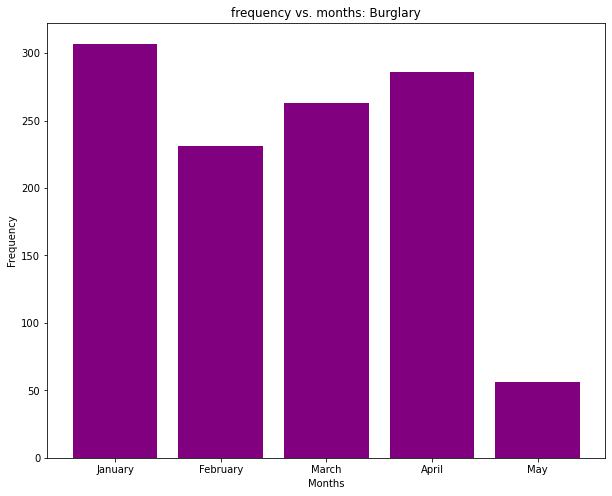

In [393]:
data = monthly_crime("BURGLARY")

data = {1:data[0], 2:data[1], 3:data[2], 4:data[3], 5:data[4]}
months = list(data.keys())
frequency = list(data.values())

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(months, frequency, color = 'purple')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['January', 'February','March', 'April', 'May'])
ax.set(xlabel = 'Months', ylabel = 'Frequency', title = 'frequency vs. months: Burglary')
plt.show()

Burglary occured the most in January so far in 2022 with a total count near 300. Excluding May once again, February had the least total count of burglary crimes with total near 225. This graph appears similarly to the first graph in the sense that the crime count decreased from January to February (in the first graph January and February had closer totals) and then continually increased each month. If I had to predict May's total count, I would say that it increases from April and might have a total count near January's.

## Hypothesis Testing

This is the fourth phase of the 'Data Science Pipeline'. The purpose here is to see whether the assumptions we made about the data is true using different modeling techniques. The modeling technique I will be focusing on is 'linear regression. Linear regression is used to model a relationship between independent and dependent variables. I'll be using this model to predict future values, which in my case would be to predict the total crime count in the month of May for the top four crimes.

Resources for hypothesis testing & linear regression are https://www.linkedin.com/pulse/data-science-pipeline-rahul-dhar?trk=public_profile_article_view and https://en.wikipedia.org/wiki/Linear_regression

To perform linear regression on a specific crime I created a function called 'linReg'. I begin by calling my other function, 'monthly_crime' to retrieve the crime count for each month for the crime passed in. I initialize my 'month' and 'frequency' variables using my data's 'keys' and 'values' (like I did in my other function). In order to use sklearn's 'linear_model.LinearRegression' function, I converted my months into a two-dimensional array using 'np.array()' and '.reshape()'. I changed my 'frequency' variable so that it was a list of just the crime counts for each month, and then converted it into an array. I was then able to use the 'linear_model.LinearRegression()' function and set that equal to a variable called 'lm'. I then fit my linear model using the indepdent (months) and dependent (frequency) variables. I plotted the values, and then plotted the linear regression line by calling '.plot()' with the independent (months) variable and with the values of 'lm.predict()' using the independent (months) variable. This was to plot what the model predicts the dependent (frequency) variable to be. I set the labels and titles accordingly. I also printed out the line's coefficient, intercept, and the score of the independent and dependent variable. The score is just the coefficient of determination of the prediction which is to assess the abilty of a model to predict/explain an outcome in linear regression. The best possible score is 1.0 (or -1.0 if negatively correlated).

The documentation for 'linear_model.LinearRegression' can be found at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The documentation for 'numpy (np)' can be found at https://numpy.org/doc/stable/

In [394]:
def linReg(crime):
    raw_data = monthly_crime(crime)

    data = {1:raw_data[0], 2:raw_data[1], 3:raw_data[2], 4:raw_data[3]}
    months = list(data.keys())
    frequency = list(data.values())
    
    months = np.array(months).reshape(-1, 1)
    frequency = [raw_data[0], raw_data[1], raw_data[2], raw_data[3]]
    frequency = np.array(frequency)
    
    lm = linear_model.LinearRegression()
    lm.fit(months, frequency)
    
    fig, ax = plt.subplots(figsize = (10,8))
    ax.scatter(months, frequency)
    ax.plot(months, lm.predict(months), color = 'red')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['January', 'February','March', 'April'])
    ax.set(xlabel = 'Months', ylabel = 'Frequency', title = 'frequency vs. months: ' + crime)
    print('Score: ' + str(lm.score(months, frequency)))
    print('Coefficient:' + str(lm.coef_))
    print('Intercept: ' + str(lm.intercept_))
    print('Prediction for May: ' + str(lm.predict([[5]])))

Score: 0.8069697635258806
Coefficient:[66.4]
Intercept: 519.0
Prediction for May: [851.]


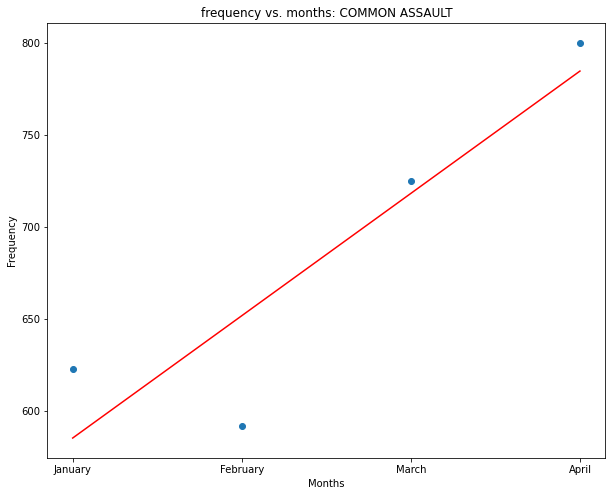

In [395]:
linReg("COMMON ASSAULT")

The score for the linear regression for common assault was ~0.81. This is relatively close to 1! This means this model should be able to predict future values. In fact, this model's prediction for the common assault total count for the month of May was 851. This goes with what I predicted based on the bar graph (that May would have 800 or more total counts).

Score: 0.5369841881989976
Coefficient:[23.6]
Intercept: 467.0
Prediction for May: [585.]


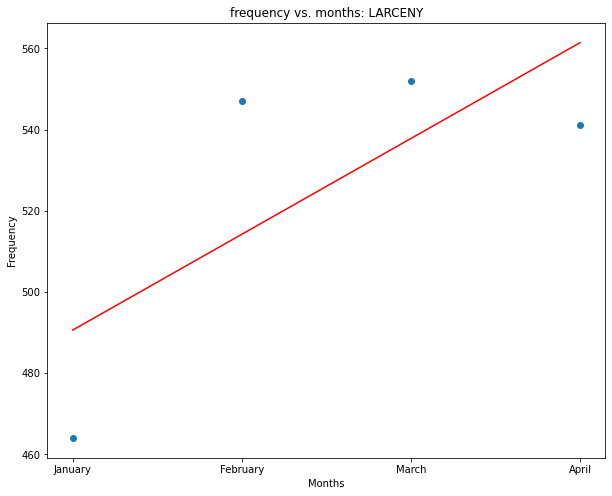

In [396]:
linReg("LARCENY")

The score for the linear regression for larceny was ~0.54. This is not that good (halfway to 1). This means this model will not be that good at predicting future values. Even without printing the score we can see that this line does not fit the data points well since the values aren't strictly increasing. The model's prediction for the larceny total count for the month of May was 585. I predicted that the total count for May would be ~550. We'll see later if a better prediction can be found.

Score: 0.5353556349464106
Coefficient:[20.3]
Intercept: 342.0
Prediction for May: [443.5]


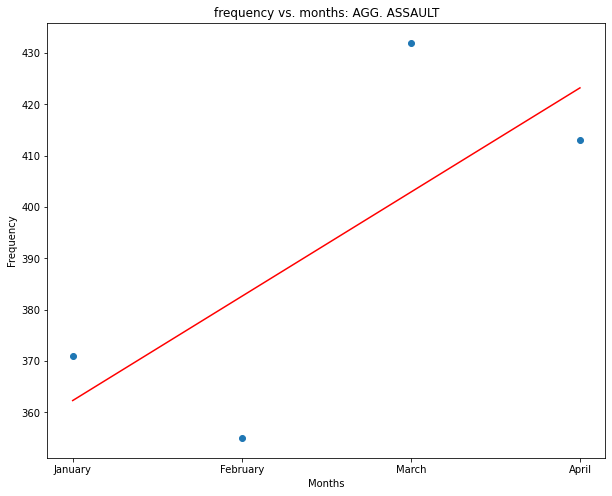

In [397]:
linReg("AGG. ASSAULT")

The score for the linear regression for aggravated assault was ~0.54. This is the same as the previous model for larceny and as I said this is not that good (halfway to 1). This means this model will not be that good at predicting future values. Even without printing the score we can see that this line does not fit the data points well since the values aren't strictly increasing. The model's prediction for the aggravated assault total count for the month of May was ~444. I predicted that the total count for May would be increased from April's total count so > 420. Even though this model isn't great, my prediction and this model's prediction agree.

Score: 0.015097007305003185
Coefficient:[-3.1]
Intercept: 279.5
Prediction for May: [264.]


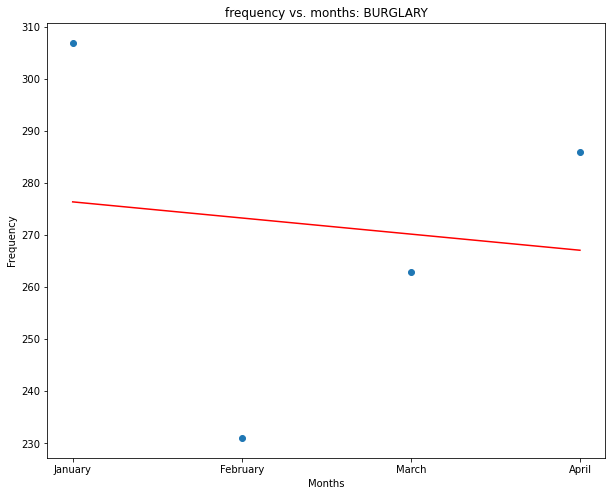

In [398]:
linReg("BURGLARY")

The score for the linear regression for burglary was ~0.02. This is very, very bad. This value is very far from 1. This means this model will not be good at predicting future values. Even without printing the score we can see that this line does not fit the data points well since the values are increasing other than January (which also had the highest total count) so it throws the model off. The model's prediction for the burglary total count for the month of May was 264. I predicted that the total count for May would be increased from April's total count so > 263. Even though this model is horrible, my prediction and this model's prediction barely agree.

However, if this linear model isn't working for our dataset, we could always try a polynomial model! In fact, polynomial regression can be much more accurate. This model will still use the relationship between the variables to find a line that fits the data. We can actually choose the degrees we want our polynomial regression model to be. I will be using 'degree = 2'.

The documentation for 'PolynomialFeatures' can be found at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

This new function 'polyLinReg' will appear quite similar to the last function 'linReg'. The difference is that instead of calling '.LinearRegression' I will be using 'PolynomialFeatures' with 'degree = 2' and setting that equal to a variable called 'poly'. I will use that variable to 'fit_transform' the months into another variable, 'poly_months' which will now replace my 'months' variable. I then use 'lm.fit()' to fit my 'poly_months' and 'frequency'. I do the same thing to plot as the last function but instead of 'months' I will use 'poly_months'. I am printing out the score. The scores should be closer to 1 this time around. Unfortunately, 'PolynomialFeatures' does not have the functionality to predict the future value for May so we will just be focusing on whether the scores get better (which imply a better future prediction).

In [399]:
def polyLinReg(crime):
    raw_data = monthly_crime(crime)

    data = {1:raw_data[0], 2:raw_data[1], 3:raw_data[2], 4:raw_data[3]}
    months = list(data.keys())
    frequency = list(data.values())
    
    months = np.array(months).reshape(-1, 1)
    frequency = [raw_data[0], raw_data[1], raw_data[2], raw_data[3]]
    frequency = np.array(frequency)
    
    poly = PolynomialFeatures(degree = 2)
    poly_months = poly.fit_transform(months)
    lm.fit(poly_months, frequency)
    
    fig, ax = plt.subplots(figsize = (10,8))
    ax.scatter(months, frequency)
    ax.plot(months, lm.predict(poly_months), color = 'red')
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['January', 'February','March', 'April'])
    ax.set(xlabel = 'Months', ylabel = 'Frequency', title = 'frequency vs. months: ' + crime)
    print('Score: ' + str(lm.score(poly_months, frequency)))

Score: 0.9097957390731388


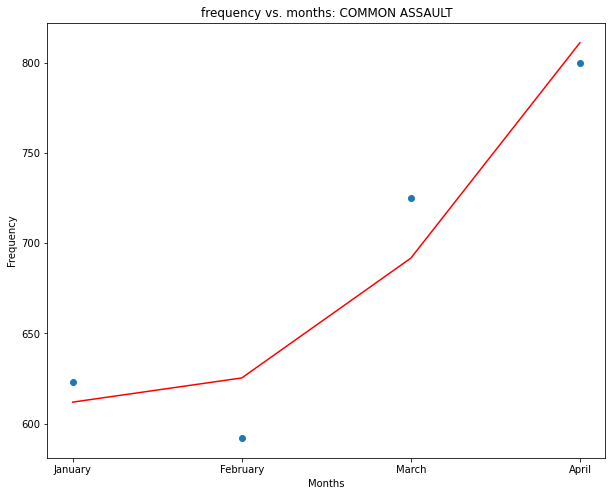

In [400]:
polyLinReg("COMMON ASSAULT")

The score for the polynomial regression for common assault was ~0.91. This is even closer better than the ~.81 score from the linear regression model! This means this model should be able to predict future values even better. Even though I cannot see this model's prediction value for May, judging by the line, it appears it might continue increasing like I predicted.

Score: 0.9629386810644045


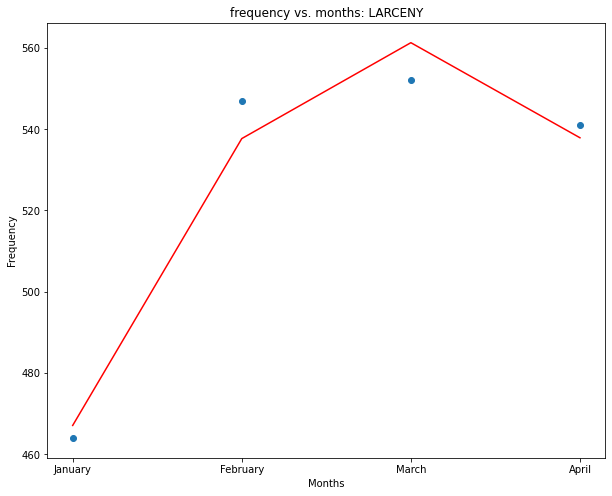

In [401]:
polyLinReg("LARCENY")

The score for the polynomial regression for larceny was ~0.96. This is way better than the ~.54 score from the linear regression model! This means this model should be able to predict future values unlike the linear model.

Score: 0.5359402403377723


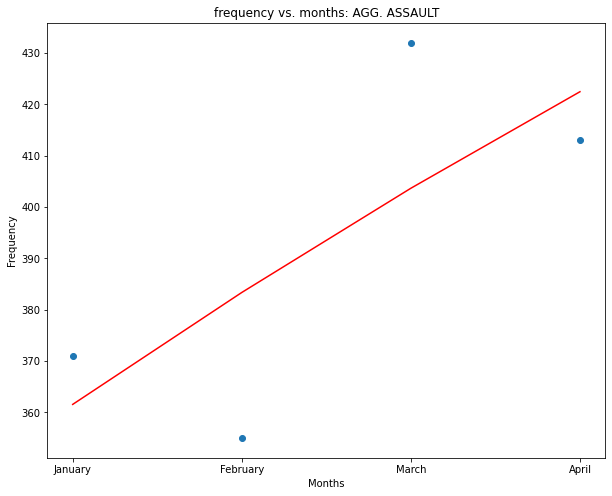

In [402]:
polyLinReg("AGG. ASSAULT")

The score for the polynomial regression for aggravated assault was ~0.54. This is the exact same as the ~.54 score from the linear regression model! This means this model should be able to predict future values the same. Even though I cannot see this model's prediction value for May, judging by the line, it appears it might continue increasing like I predicted (even though the line isn't fitting well).

Score: 0.7849501217500591


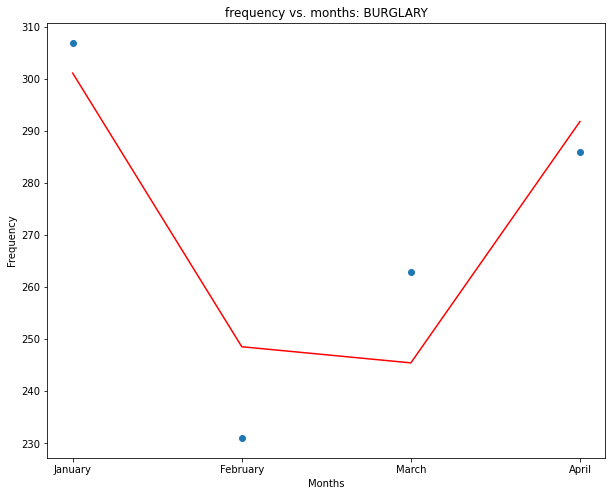

In [403]:
polyLinReg("BURGLARY")

The score for the polynomial regression for burglary was ~0.78. This is extremely better than the ~.02 score from the linear regression model! This means this model should be able to predict future values way better than the linear model. Even though I cannot see this model's prediction value for May, judging by the line, it appears it might continue increasing like I predicted.

It's important to note that increasing the degrees in the polynomial regression can lead to over-fitting. Over-fitting is a modeling error that occurs when a function is too closely aligned to the limited dataset meaning this model is only useful for the current data. For more information, https://www.investopedia.com/terms/o/overfitting.asp#:~:text=Overfitting%20is%20a%20modeling%20error,to%20any%20other%20data%20sets.

## Communication of Insights Attained

This is the fifth and final phase of the 'Data Science Pipeline'. This is where we try and make 'insights' or conclusions from the data and data analysis conducted.

Based on my data analysis, I would suggest that common assault and burglary are on the incline. Meaning this month, May, in Baltimore, there can be seen more of those crimes. Aggravated assault and larceny are harder to suggest, however if I were to follow the trend from the bar plots and polynomial models, I would suggest those might see an increase as well, although not as great as the common assault and burglary.

By looking at the maps from the third phase, I would suggest that the closer one is to the city of Baltimore (directly inside), the greater crime they will see. This also comes from the fact that the neighborhood with the most crime, Downtown, is located in the city of Baltimore.

I also noticed that in three of the four bar plots, March and April had the greatest amount of crime which supports that crime might be on the incline.

I choose to map only the top four crimes in Baltimore however to make further conclusions one could have mapped two crimes on the same map to see the similarties and differences between where the crimes occured. I also could have done my data analysis throughout the years instead of focusing solely on 2022 (this might have led to better predictions). Once the May data has been added to the dataset, comparisons can be made between the predicted values and the actua values. This data can then be used to predict the next month and so on.

In conclusion, this data can be used to look at crime trends/patterns in Baltimore, Maryland and to further predict the where and when these crimes will occur. We could see the neighborhoods susceptible to certain crimes and see which crimes might be increasing so that those in Baltimore, Maryland can be informed and aware.